In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [6]:
ls


gdrive/  sample_data/


In [7]:
!pip install face_recognition

HOG features


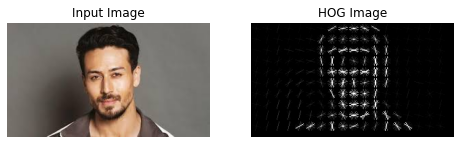

In [8]:
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import data, exposure
import cv2

image = cv2.imread('/content/gdrive/My Drive/Classroom/images.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

fd, hog_image= hog(image, orientations=8,pixels_per_cell=(16,16),cells_per_block=(1,1),visualize =True, multichannel=True)
# plotting:
fig,(ax1,ax2)= plt.subplots(1,2,figsize=(8,4), sharex= True,sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap= plt.cm.gray)
ax1.set_title('Input Image')

#Rescaling:
hog_image_rescaled= exposure.rescale_intensity(hog_image, in_range=(0,10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap= plt.cm.gray)
ax2.set_title('HOG Image')
plt.show()

Face Recognition

In [9]:
#!pip install face-recognition
import face_recognition

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
import numpy as np
import cv2
%matplotlib inline

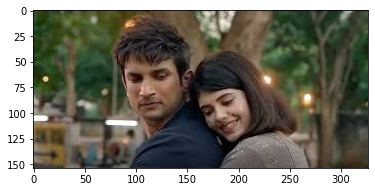

In [25]:
image = cv2.imread('/content/gdrive/My Drive/Classroom/5.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [26]:
#identify all the faces:
face_locations = face_recognition.face_locations(image)
no_of_faces = len(face_locations)
print("found {} face(s) in the input image".format(no_of_faces))

found 2 face(s) in the input image


A face is located at pixe location top: 80, Bottom: 46, Right: 142, left: 108
A face is located at pixe location top: 158, Bottom: 78, Right: 210, left: 130


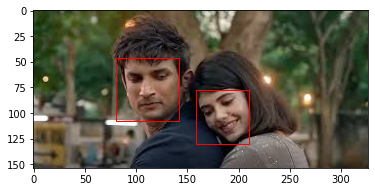

In [27]:
# axis handles:
plt.imshow(image)
ax= plt.gca()

for face_location in face_locations:
  top,right,bottom,left = face_location
  x,y,w,h =left, top, right, bottom
  print("A face is located at pixe location top: {}, Bottom: {}, Right: {}, left: {}".format(x,y,w,h))

  #drawing boxes:
  rect = Rectangle((x,y),w-x,h-y,fill = False ,color ='red')
  ax.add_patch(rect)

plt.show()

In [35]:
 #face encoding:
image = cv2.imread('/content/gdrive/My Drive/Classroom/kareena.jpg')
kareena = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

image = cv2.imread('/content/gdrive/My Drive/Classroom/sushant.jpg')
sushant = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

image = cv2.imread('/content/gdrive/My Drive/Classroom/brucelee.jpg')
brucelee = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


In [36]:
kareena_encoding= face_recognition.face_encodings(kareena)[0]
sushant_encoding= face_recognition.face_encodings(sushant)[0]
brucelee_encoding= face_recognition.face_encodings(brucelee)[0]

#create a database:
known_faces_encodings =[ kareena_encoding, sushant_encoding,brucelee_encoding]


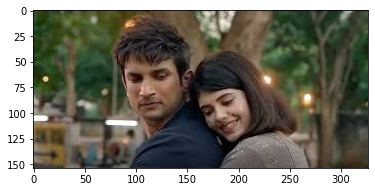

In [37]:
#check the unknown img:
image = cv2.imread('/content/gdrive/My Drive/Classroom/5.jpg')
Unknownimage = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(Unknownimage)
unknownimg_encoding= face_recognition.face_encodings(Unknownimage)

In [48]:
from scipy.spatial import distance

for unknownimg_encoding in known_faces_encodings:
#  results = face_recognition.compare_faces(known_faces_encodings,unknownimg_encoding,tolerance=0.6)
  results =[]
  for known_faces_encoding in known_faces_encodings:
    d=distance.euclidean(known_faces_encoding, unknownimg_encoding)
   # print(d)
    results.append(d)
    threshold=0.6
    results = np.array(results) <= threshold

  name = "Unknown"
  if results[0]:
    name = "kareena"
  elif results[1]:
      name= "sushant"
  elif results[2]:
        name= "brucelee"

  print(f"Found {name} in the photo")


AttributeError: ignored

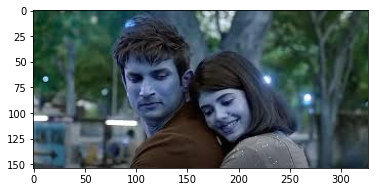

In [45]:
 plt.imshow(image)